In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_pickle('base_nfp.pkl')
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


In [26]:
#Separando a base de dados a partir de janeiro de 2020
data=df[df['Data Registro']>='2020-01-01']

In [42]:
tab=pd.crosstab(data.categoria,data.flag_credito,margins=True,margins_name='total').sort_values(by=1,ascending=False)
tab

flag_credito,0,1,total
categoria,,,
total,49680,37431,87111
Mercado,14388,13196,27584
Construção,8526,7537,16063
não definido,11743,6737,18480
Farmácia,6611,3590,10201
Alimentos,1609,3452,5061
Restaurantes,553,1637,2190
Varejo,4368,704,5072
Vestuário,1477,443,1920


- Calculando o WOE 

In [44]:
#Criando um coluna com percentual de eventos e não eventos
tab['pct_nao_evento']=tab[0]/tab.loc['total',0]
tab['pct_evento']=tab[1]/tab.loc['total',1]
tab

flag_credito,0,1,total,pct_não_evento,pct_evento,pct_nao_evento
categoria,,,,,,
total,49680,37431,87111,1.000000,1.000000,1.000000
Mercado,14388,13196,27584,0.289614,0.352542,0.289614
Construção,8526,7537,16063,0.171618,0.201357,0.171618
não definido,11743,6737,18480,0.236373,0.179985,0.236373
Farmácia,6611,3590,10201,0.133072,0.095910,0.133072
Alimentos,1609,3452,5061,0.032387,0.092223,0.032387
Restaurantes,553,1637,2190,0.011131,0.043734,0.011131
Varejo,4368,704,5072,0.087923,0.018808,0.087923
Vestuário,1477,443,1920,0.029730,0.011835,0.029730


In [47]:
#Criando uma coluna WOE e RC
tab['RC']=tab['pct_evento']/tab['pct_nao_evento']
tab['woe']=np.log(tab['pct_evento']/tab['pct_nao_evento'])
tab

flag_credito,0,1,total,pct_não_evento,pct_evento,pct_nao_evento,RC,woe
categoria,,,,,,,,
total,49680,37431,87111,1.000000,1.000000,1.000000,1.000000,0.000000
Mercado,14388,13196,27584,0.289614,0.352542,0.289614,1.217284,0.196622
Construção,8526,7537,16063,0.171618,0.201357,0.171618,1.173285,0.159807
não definido,11743,6737,18480,0.236373,0.179985,0.236373,0.761443,-0.272539
Farmácia,6611,3590,10201,0.133072,0.095910,0.133072,0.720738,-0.327480
Alimentos,1609,3452,5061,0.032387,0.092223,0.032387,2.847508,1.046444
Restaurantes,553,1637,2190,0.011131,0.043734,0.011131,3.928925,1.368366
Varejo,4368,704,5072,0.087923,0.018808,0.087923,0.213914,-1.542179
Vestuário,1477,443,1920,0.029730,0.011835,0.029730,0.398083,-0.921095


C:\Users\General\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='woe', ylabel='categoria'>

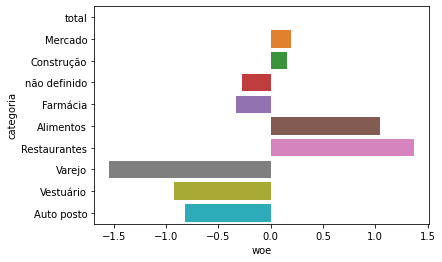

In [53]:
#Visualização grafico do WOE
sns.barplot(tab['woe'],tab.index)

- É possível verificar que as categorias de **Alimentos** e **Restaurantes** possuem maior peso, já o **Varejo** possue o menor peso.

In [54]:
tab

flag_credito,0,1,total,pct_não_evento,pct_evento,pct_nao_evento,RC,woe
categoria,,,,,,,,
total,49680,37431,87111,1.000000,1.000000,1.000000,1.000000,0.000000
Mercado,14388,13196,27584,0.289614,0.352542,0.289614,1.217284,0.196622
Construção,8526,7537,16063,0.171618,0.201357,0.171618,1.173285,0.159807
não definido,11743,6737,18480,0.236373,0.179985,0.236373,0.761443,-0.272539
Farmácia,6611,3590,10201,0.133072,0.095910,0.133072,0.720738,-0.327480
Alimentos,1609,3452,5061,0.032387,0.092223,0.032387,2.847508,1.046444
Restaurantes,553,1637,2190,0.011131,0.043734,0.011131,3.928925,1.368366
Varejo,4368,704,5072,0.087923,0.018808,0.087923,0.213914,-1.542179
Vestuário,1477,443,1920,0.029730,0.011835,0.029730,0.398083,-0.921095



## Calculando o *Information Value* (IV)

In [57]:
#Criando uma coluna de Information Value parcial
tab['iv_parcial']=(tab.pct_evento - tab.pct_nao_evento)*tab.woe
tab

flag_credito,0,1,total,pct_não_evento,pct_evento,pct_nao_evento,RC,woe,iv_parcial
categoria,,,,,,,,,
total,49680,37431,87111,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
Mercado,14388,13196,27584,0.289614,0.352542,0.289614,1.217284,0.196622,0.012373
Construção,8526,7537,16063,0.171618,0.201357,0.171618,1.173285,0.159807,0.004752
não definido,11743,6737,18480,0.236373,0.179985,0.236373,0.761443,-0.272539,0.015368
Farmácia,6611,3590,10201,0.133072,0.095910,0.133072,0.720738,-0.327480,0.012170
Alimentos,1609,3452,5061,0.032387,0.092223,0.032387,2.847508,1.046444,0.062615
Restaurantes,553,1637,2190,0.011131,0.043734,0.011131,3.928925,1.368366,0.044612
Varejo,4368,704,5072,0.087923,0.018808,0.087923,0.213914,-1.542179,0.106587
Vestuário,1477,443,1920,0.029730,0.011835,0.029730,0.398083,-0.921095,0.016483


In [60]:
print(tab.iv_parcial.sum())

0.2786678082561656


<font color='gray'>**De acordo com a tabela IV o poder de discriminação é mediana**</font>


Tabela IV| Preditor|
---------|---------|
< 0.02    | <font color='red'> **Muito baixo** </font>|
0,02 e 0,1| <font color='orange'>**Fraca predição**</font>|
0,1 a 0,3 |<font color='green'>**Predição mediana** </font>|
0,3 e 0,5 | <font color='green'>**Predição forte**</font>|
> 0,5      |<font color='red'> **Suspeitar da predição**</font>|

